# Vamos a calcular las medianas para diferentes variables para cada snapnum
# Para galaxias mayores a 10^8 masas solares

In [1]:
import numpy as np
import pandas as pd
import Curves2D
import matplotlib.pyplot as plt
from scipy import interpolate

In [2]:
MEDIANS = pd.DataFrame(columns=['SnapNum','Log(Stars_Mass)','Log(SF_Mass+Stars_Mass)',
                                'Log(Stars_Metallicity/Z_sun)','12+Log(O/H)','SF_Mass/(SF_Mass+Stars_Mass)',
                                'Log(StarFormationRate)','Log(StarFormationRate/Stars_Mass)','R_halfmass30',
                                'KappaCoRot','Log(BlackHoleMass)'])

ERROR_MEDIANS = pd.DataFrame(columns=['SnapNum','Log(Stars_Mass)','Log(SF_Mass+Stars_Mass)',
                                'Log(Stars_Metallicity/Z_sun)','12+Log(O/H)','SF_Mass/(SF_Mass+Stars_Mass)',
                                'Log(StarFormationRate)','Log(StarFormationRate/Stars_Mass)','R_halfmass30',
                                'KappaCoRot','Log(BlackHoleMass)'])

In [3]:
# Escribimos en latex

plt.rcParams['text.usetex'] = False

### Ejecutamos de acá para los diferentes snaps y graficamos

In [4]:
snap = 25

In [5]:
path ='/home/ramiro/Facultad/Tesis/Datos/Actividad 10/'

In [6]:
DF = pd.read_csv(path+'Tabla_para_medianas_RefL0100N1504_snap_'+str(snap)+'.dat')
DF

,GalaxyID,SnapNum,redshift,Stars_Mass,SF_Hydrogen,SF_Oxygen,SF_Mass,Stars_Metallicity,StarFormationRate,BlackHoleMass,R_halfmass30,KappaCoRot
0,29820,25,0.270901,2.686233e+10,0.574550,0.029867,1.197441e+09,0.023524,1.248087,2.796218e+06,3.836028,0.363260
1,32369,25,0.270901,2.043794e+10,0.597945,0.026870,1.160709e+09,0.020729,0.834041,1.327181e+06,3.136267,0.476324
2,33118,25,0.270901,1.423081e+10,0.580770,0.028503,2.906124e+08,0.020378,0.131133,1.949628e+06,5.098754,0.577122
3,38550,25,0.270901,8.906608e+09,0.583616,0.027819,2.610455e+08,0.020237,0.171570,3.903435e+05,3.474617,0.535788
4,41637,25,0.270901,8.653133e+09,0.605005,0.024632,3.998380e+08,0.018997,0.424695,5.293046e+05,2.223401,0.252854
...,...,...,...,...,...,...,...,...,...,...,...,...
17952,13072134,25,0.270901,1.429851e+09,0.670144,0.014855,2.308632e+08,0.012262,0.125723,7.049888e+05,3.527229,0.149539
17953,13072578,25,0.270901,1.255980e+09,0.709699,0.008864,6.043105e+08,0.011963,0.252308,1.580867e+05,3.600215,0.527883
17954,13072870,25,0.270901,5.117382e+08,0.682354,0.012739,1.189877e+08,0.010311,0.054391,6.180198e+05,2.256692,0.173283
17955,13073160,25,0.270901,1.940335e+09,0.711308,0.008360,8.398556e+08,0.012861,0.330740,4.876754e+05,3.087260,0.250780


## Creamos un dataframe con las variables que nos interesan

In [7]:
VAR = pd.DataFrame(columns=['GalaxyID','SnapNum','Log(Stars_Mass)','Log(SF_Mass+Stars_Mass)','Log(Stars_Metallicity/Z_sun)',
                            '12+Log(O/H)','SF_Mass/(SF_Mass+Stars_Mass)','Log(StarFormationRate)',
                            'Log(StarFormationRate/Stars_Mass)','R_halfmass30','Log(BlackHoleMass)'])

In [8]:
VAR['GalaxyID'] = DF['GalaxyID']

VAR['SnapNum']=DF['SnapNum']

VAR['Log(Stars_Mass)'] = np.log10(DF['Stars_Mass'])

VAR['Log(SF_Mass+Stars_Mass)'] = np.log10(DF['SF_Mass']+DF['Stars_Mass'])

VAR['Log(Stars_Metallicity/Z_sun)'] = np.log10(DF['Stars_Metallicity'])-np.log10(0.02)

VAR['12+Log(O/H)'] = 12+np.log10(DF['SF_Oxygen']/DF['SF_Hydrogen'])-np.log10(16)

VAR['SF_Mass/(SF_Mass+Stars_Mass)'] = DF['SF_Mass']/(DF['SF_Mass']+DF['Stars_Mass'])

VAR['Log(StarFormationRate)'] = np.log10(DF['StarFormationRate'])

VAR['Log(StarFormationRate/Stars_Mass)'] = np.log10(DF['StarFormationRate'])-np.log10(DF['Stars_Mass'])

VAR['R_halfmass30'] = DF['R_halfmass30']

VAR['Log(BlackHoleMass)'] = np.log10(DF['BlackHoleMass'])

VAR['KappaCoRot'] = DF['KappaCoRot']

/home/ramiro/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [9]:
min(VAR['Log(Stars_Mass)'].values)

8.539953881741262

### Separamos en bines equiespaciados y calculamos las medianas

In [10]:
# Magnitudes a las cuales les vamos a calcular la mediana y lso percentiles
xvar = [
        VAR['Log(Stars_Mass)'].values,
       ]

yvar =  [
        VAR['Log(Stars_Mass)'].values,
        VAR['Log(SF_Mass+Stars_Mass)'].values,
        VAR['Log(Stars_Metallicity/Z_sun)'].values,
        VAR['12+Log(O/H)'].values,
        VAR['SF_Mass/(SF_Mass+Stars_Mass)'].values,
        VAR['Log(StarFormationRate)'].values, 
        VAR['Log(StarFormationRate/Stars_Mass)'].values,
        VAR['R_halfmass30'].values,
        VAR['KappaCoRot'].values,
        VAR['Log(BlackHoleMass)'].values
        
        ]

In [11]:
nbins=15        # Numero de bins en variable x a usar para dividir la muestra
perc_low=25.        # Percentil a usar como cota inferior de error
perc_high=75.       # Percentil a usar como cota superior de error
min_count=10      # Mínima cantidad de elementos para considerar en un bin

yvar_medians=[]
yvar_errors=[]

for j in np.arange(len(yvar)):
    xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xvar[0],yvar[j],bins=nbins,min_count=min_count,
                                                                 perc_low=perc_low,perc_high=perc_high)
    yvar_medians.append(ymedian)
    yvar_errors.append(yerror)


In [12]:
xlabels=[r'$Log(M_{Star})[M_{Sun}]$']

ylabels=[
         r'$Log(M_{Star})[M_{Sun}]$'
        ,r'$Log(MSF_{gas}+M_{Star})[M_{Sun}]$'
        ,r'$Log(Z_{Star}/Z_{Sun})$'
        ,r'$12+Log(O/H)$'
        ,r'$MSF_{gas}/(MSF_{gas}+M_{Star})$'
        ,r'$Log(SFR)[unidad]$'
        ,r'$Log(sSFR)[unidad]$'
        ,r'$R_{HM30}[pkpc]$'
        ,r'$KappaCoRot$'
        ,r'$Log(BlackHoleMass)$'
        ]

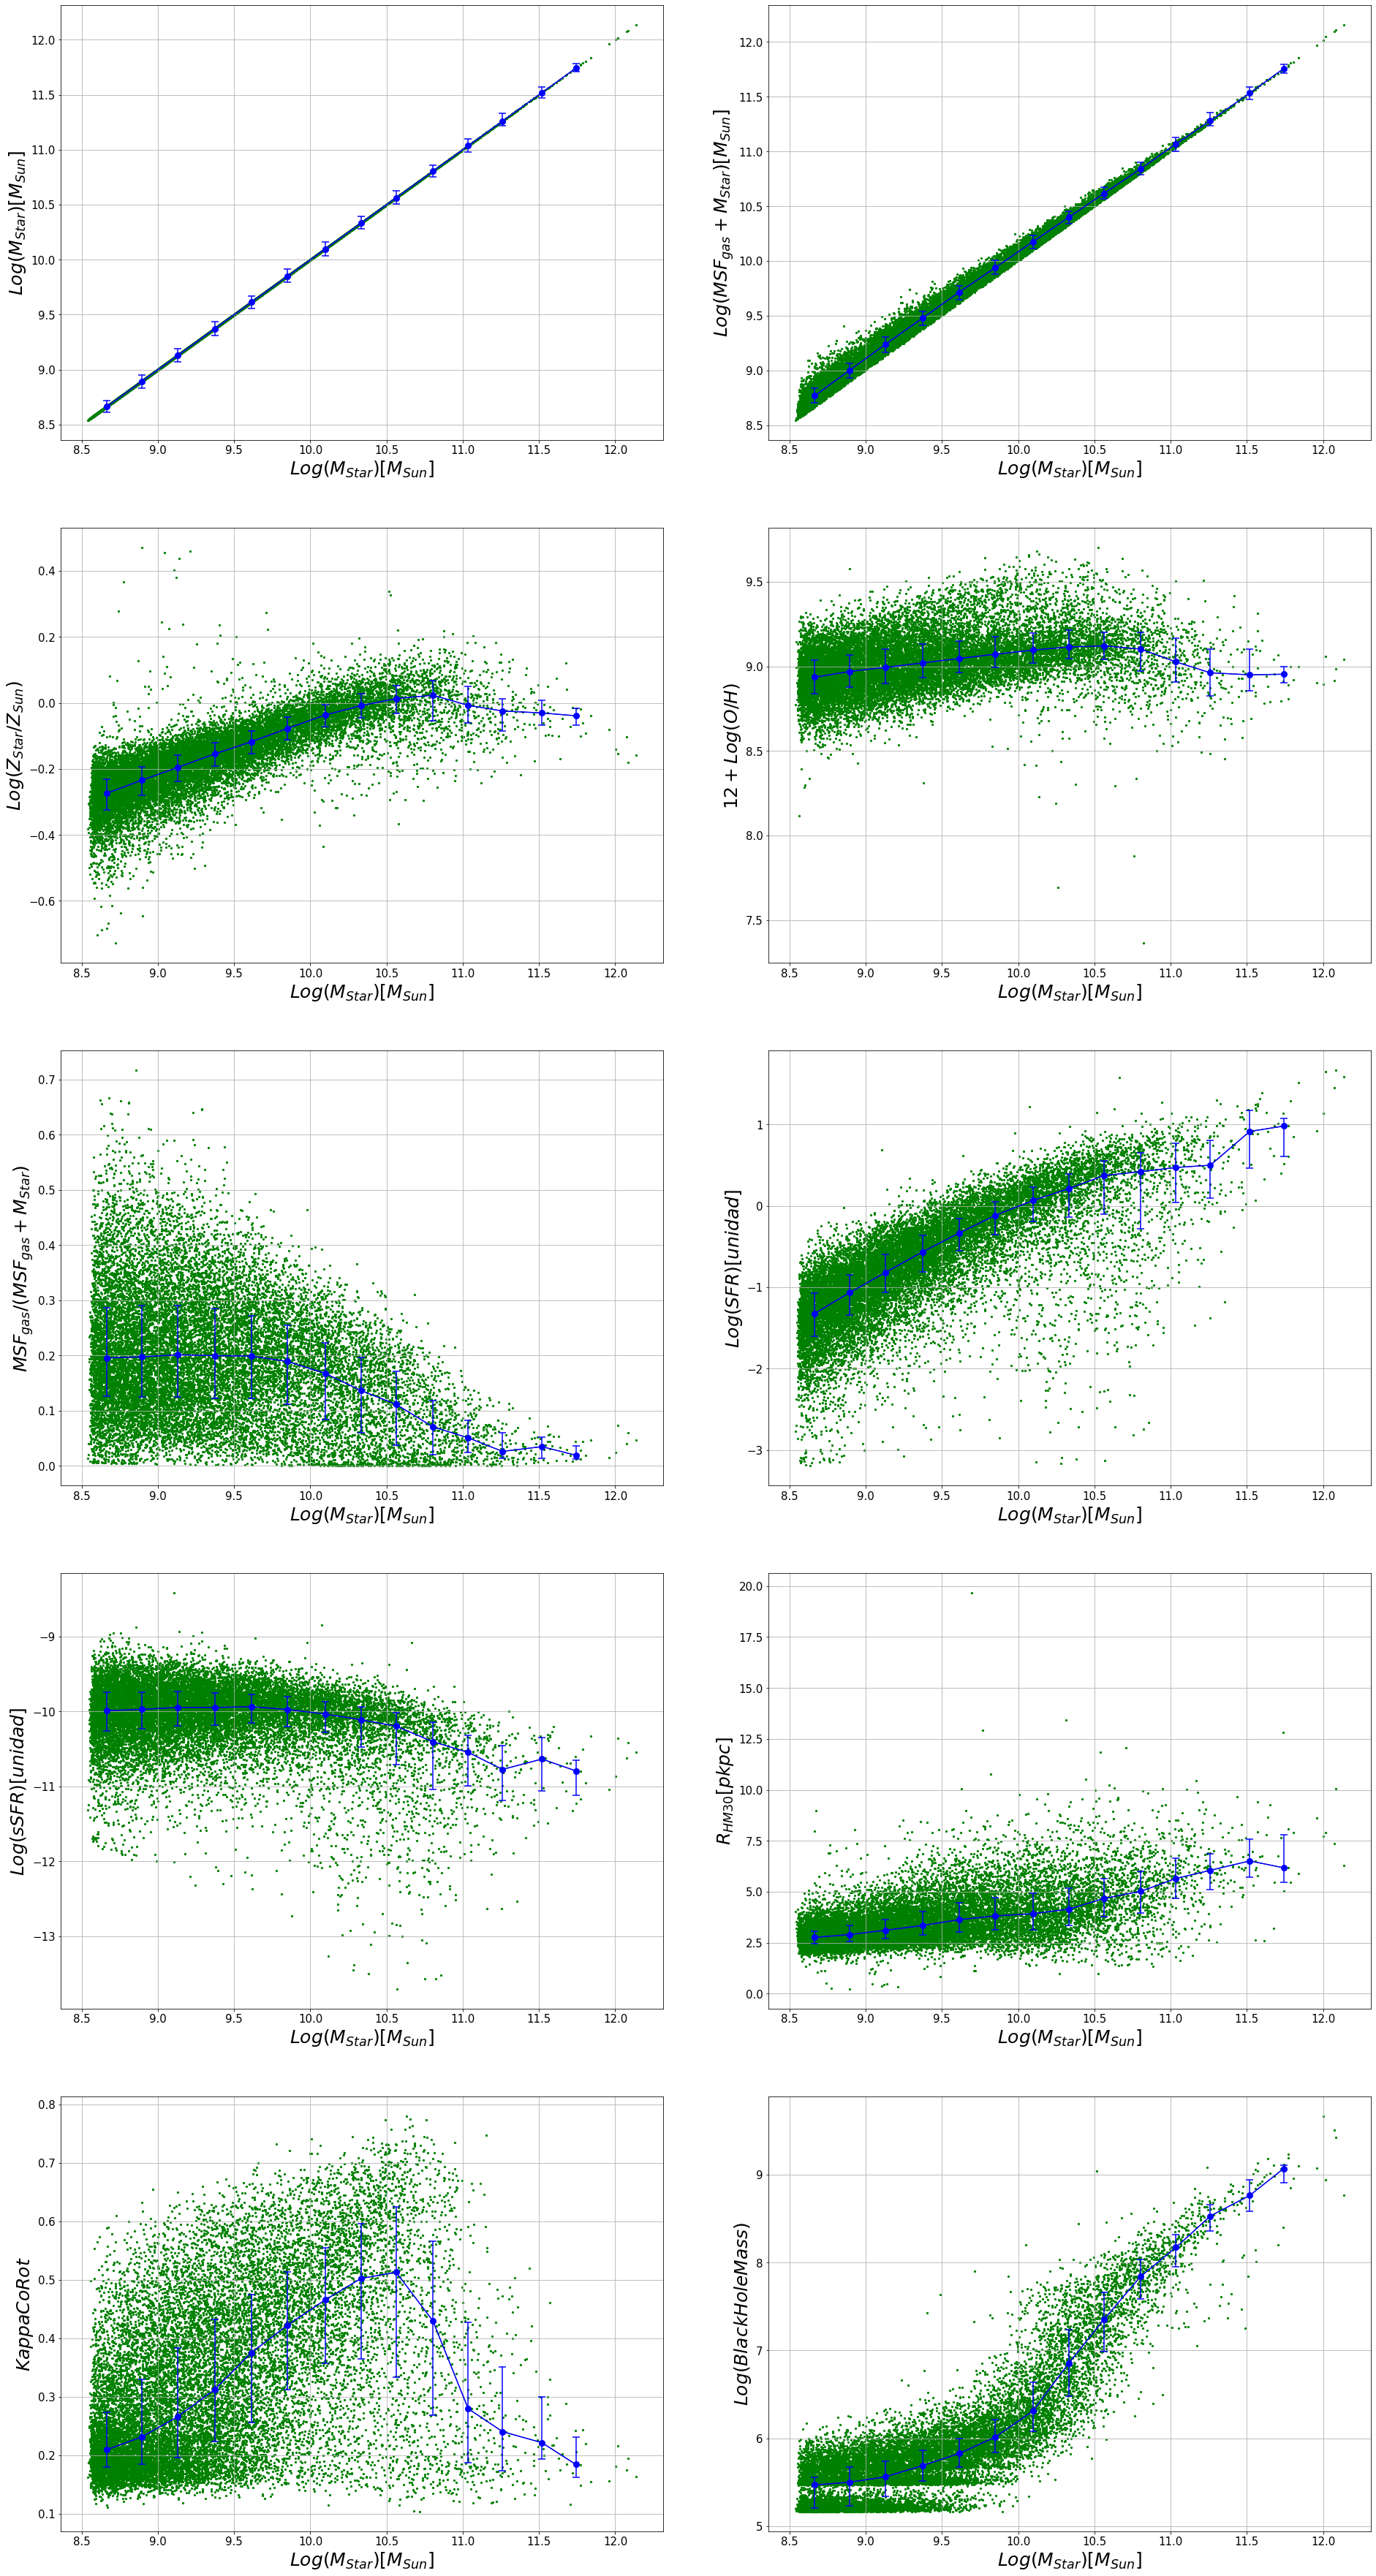

In [13]:
fig,ax = plt.subplots(5,2,figsize=(30,60))
ax = ax.flatten() # Convertimos a ax en una array plano para recorrerlo tranqui con un for 

fig.tight_layout(pad=12.0)

fontdict ={'fontsize': 30}

# fig.suptitle(r'$Graficos\ para\ la\ media\ de\ las\ magnitudes\ de\ $'+str(a)+'$\ en\ el\ snap\ 28.$', fontsize=30)

for i in np.arange(len(ylabels)):

#     xlim=(min(xvar[i]),max(xvar[i]))
    ylim=(min(yvar[i])-0.05*abs(min(yvar[i])),max(yvar[i])+0.05*abs(max(yvar[i])))

    ax[i].set_xlabel(str(xlabels[0]),fontsize=25)
    ax[i].set_ylabel(str(ylabels[i]),fontsize=25)

#     ax[i].set_xlim(min(xvar_main[i].values),max(xvar_main[i].values))
#     ax[i].set_xlim(xlim)
#     ax[i].set_ylim(ylim)

    ax[i].tick_params(axis='both', which='major', labelsize=15)
                
    plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)
     

#    # scatter plot
      #Para el tree
#     ax[i].scatter(xvar_tree[i],yvar_tree[i],marker='o',s=2,c='0.3',label='Scatter plot')

    # Para la rama principal
    ax[i].plot(xmedian,yvar_medians[i],linestyle='-',c='k',lw=1)
    ax[i].scatter(xvar[0],yvar[i],marker='o',s=5,c='g',linestyle='-',label='Scatter plot')
    
#     ax[i].scatter(xID[0],yID[i],marker='o',s=80,c='r')

    
    # Curva mediana con barras de error y marcadores

    ax[i].errorbar(xmedian,yvar_medians[i],yerr=yvar_errors[i],c='b',marker='o',markersize=8,linestyle='-',
                                                 linewidth=1.5,label='Median relation',capsize=5,capthick=1.5)
  
    ax[i].grid()

# plt.savefig(path_lin_fig+'figura_version1.png')

plt.show()

## Generalizamos y hacemos dataframes con los valores medios y los errores desde el snap 4 en adelante

In [14]:
for snap in np.arange(4,29):

    path ='/home/ramiro/Facultad/Tesis/Datos/Actividad 10/Tabla_para_medianas_RefL0100N1504_snap_'+str(snap)+'.dat'

    DF = pd.read_csv(path)

    VAR = pd.DataFrame(columns=['GalaxyID','SnapNum','Log(Stars_Mass)','Log(SF_Mass+Stars_Mass)','Log(Stars_Metallicity/Z_sun)',
                                '12+Log(O/H)','SF_Mass/(SF_Mass+Stars_Mass)','Log(StarFormationRate)',
                                'Log(StarFormationRate/Stars_Mass)','R_halfmass30','Log(BlackHoleMass)'])

    VAR['GalaxyID'] = DF['GalaxyID']

    VAR['SnapNum']=DF['SnapNum']

    VAR['Log(Stars_Mass)'] = np.log10(DF['Stars_Mass'])

    VAR['Log(SF_Mass+Stars_Mass)'] = np.log10(DF['SF_Mass']+DF['Stars_Mass'])

    VAR['Log(Stars_Metallicity/Z_sun)'] = np.log10(DF['Stars_Metallicity'])-np.log10(0.02)

    VAR['12+Log(O/H)'] = 12+np.log10(DF['SF_Oxygen']/DF['SF_Hydrogen'])-np.log10(16)
 
    VAR['SF_Mass/(SF_Mass+Stars_Mass)'] = DF['SF_Mass']/(DF['SF_Mass']+DF['Stars_Mass'])

    VAR['Log(StarFormationRate)'] = np.log10(DF['StarFormationRate'])

    VAR['Log(StarFormationRate/Stars_Mass)'] = np.log10(DF['StarFormationRate'])-np.log10(DF['Stars_Mass'])

    VAR['R_halfmass30'] = DF['R_halfmass30']

    VAR['Log(BlackHoleMass)'] = np.log10(DF['BlackHoleMass'])

    VAR['KappaCoRot'] = DF['KappaCoRot']

    # Magnitudes a las cuales les vamos a calcular la mediana y lso percentiles
    xvar = [
            VAR['Log(Stars_Mass)'].values,
           ]

    yvar =  [
            VAR['Log(Stars_Mass)'].values,
            VAR['Log(SF_Mass+Stars_Mass)'].values,
            VAR['Log(Stars_Metallicity/Z_sun)'].values,
            VAR['12+Log(O/H)'].values,
            VAR['SF_Mass/(SF_Mass+Stars_Mass)'].values,
            VAR['Log(StarFormationRate)'].values, 
            VAR['Log(StarFormationRate/Stars_Mass)'].values,
            VAR['R_halfmass30'].values,
            VAR['KappaCoRot'].values,
            VAR['Log(BlackHoleMass)'].values
            ]

    nbins     = 15    # Numero de bins en variable x a usar para dividir la muestra
    perc_low  = 25.   # Percentil a usar como cota inferior de error
    perc_high = 75.   # Percentil a usar como cota superior de error
    min_count = 10    # Mínima cantidad de elementos para considerar en un bin

    yvar_medians=[]
    yvar_errors=[]

    # Los valores medios y sus percentiles
    for j in np.arange(len(yvar)):
        xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xvar[0],yvar[j],bins=nbins,min_count=min_count,
                                                                     perc_low=perc_low,perc_high=perc_high)
        yvar_medians.append(ymedian)
        yvar_errors.append(yerror)


    mag = pd.Series(yvar_medians)

    mag_errors = pd.Series(yvar_errors)

    lugar = snap
    limite = 0

    # Nos contruimos los dataframaes finales
    
    MEDIANS.loc[lugar-limite,'SnapNum'] = snap
    MEDIANS.at[lugar-limite,'Log(Stars_Mass)'] = mag.iloc[0]
    MEDIANS.at[lugar-limite,'Log(SF_Mass+Stars_Mass)'] = mag.iloc[1]
    MEDIANS.at[lugar-limite,'Log(Stars_Metallicity/Z_sun)'] = mag.iloc[2]
    MEDIANS.at[lugar-limite,'12+Log(O/H)'] = mag.iloc[3]
    MEDIANS.at[lugar-limite,'SF_Mass/(SF_Mass+Stars_Mass)'] = mag.iloc[4]
    MEDIANS.at[lugar-limite,'Log(StarFormationRate)'] = mag.iloc[5]
    MEDIANS.at[lugar-limite,'Log(StarFormationRate/Stars_Mass)'] = mag.iloc[6]
    MEDIANS.at[lugar-limite,'R_halfmass30'] = mag.iloc[7]
    MEDIANS.at[lugar-limite,'KappaCoRot'] = mag.iloc[8]
    MEDIANS.at[lugar-limite,'Log(BlackHoleMass)'] = mag.iloc[9]



    ERROR_MEDIANS.loc[lugar-limite,'SnapNum'] = snap
    ERROR_MEDIANS.at[lugar-limite,'Log(Stars_Mass)'] = mag_errors.iloc[0]
    ERROR_MEDIANS.at[lugar-limite,'Log(SF_Mass+Stars_Mass)'] = mag_errors.iloc[1]
    ERROR_MEDIANS.at[lugar-limite,'Log(Stars_Metallicity/Z_sun)'] = mag_errors.iloc[2]
    ERROR_MEDIANS.at[lugar-limite,'12+Log(O/H)'] = mag_errors.iloc[3]
    ERROR_MEDIANS.at[lugar-limite,'SF_Mass/(SF_Mass+Stars_Mass)'] = mag_errors.iloc[4]
    ERROR_MEDIANS.at[lugar-limite,'Log(StarFormationRate)'] = mag_errors.iloc[5]
    ERROR_MEDIANS.at[lugar-limite,'Log(StarFormationRate/Stars_Mass)'] = mag_errors.iloc[6]
    ERROR_MEDIANS.at[lugar-limite,'R_halfmass30'] = mag_errors.iloc[7]
    ERROR_MEDIANS.at[lugar-limite,'KappaCoRot'] = mag_errors.iloc[8]
    ERROR_MEDIANS.at[lugar-limite,'Log(BlackHoleMass)'] = mag_errors.iloc[9]

/home/ramiro/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [15]:
# MEDIANS

In [16]:
# ERROR_MEDIANS

## Descargamos los datos de las galxias post y pre mergers

In [17]:
path ='/home/ramiro/Facultad/Tesis/Datos/Actividad 10/'

In [18]:
SUB = pd.read_csv(path+'Subhalo_maxmergers(todo>0.01).dat')
SIZ = pd.read_csv(path+'Sizes_maxmergers(todo>0.01).dat')
MOR = pd.read_csv(path+'MorphoKinem_maxmergers(todo>0.01).dat')
FOF = pd.read_csv(path+'FOF_maxmergers(todo>0.01).dat')

SUB_NON = pd.read_csv(path+'Subhalo_maxmergers(=1).dat')
SIZ_NON = pd.read_csv(path+'Sizes_maxmergers(=1).dat')
MOR_NON = pd.read_csv(path+'MorphoKinem_maxmergers(=1).dat')
FOF_NON = pd.read_csv(path+'FOF_maxmergers(=1).dat')

In [19]:
# Tiramos filas duplicadas

SIZ = SIZ.drop_duplicates()
MOR = MOR.drop_duplicates()
FOF = FOF.drop_duplicates()

SUB_NON = SUB_NON.drop_duplicates()
SIZ_NON = SIZ_NON.drop_duplicates()
MOR_NON = MOR_NON.drop_duplicates()
FOF_NON = FOF_NON.drop_duplicates()

In [20]:
# Armo un dataframe con las variables que usamos para graficar las galaxias que no sufrieron mergers
VAR_SUB_NON = pd.DataFrame(columns=['GalaxyID','GroupID','DescendantID','Lm','SnapNum','SubGroupNumber','Log(Stars_Mass)','Log(SF_Mass+Stars_Mass)','Log(Stars_Metallicity/Z_sun)',
                                    '12+Log(O/H)','SF_Mass/(SF_Mass+Stars_Mass)','Log(StarFormationRate)',
                                    'Log(StarFormationRate/Stars_Mass)','Log(BlackHoleMass)'])

VAR_SUB_NON['GalaxyID'] = SUB_NON['GalaxyID']
VAR_SUB_NON['DescendantID'] = SUB_NON['DescendantID']
VAR_SUB_NON['GroupID'] = SUB_NON['GroupID']
VAR_SUB_NON['Lm'] = SUB_NON['Lm_max']
VAR_SUB_NON['SnapNum']=SUB_NON['SnapNum']
VAR_SUB_NON['SubGroupNumber'] = SUB_NON['SubGroupNumber']
VAR_SUB_NON['Log(Stars_Mass)'] = np.log10(SUB_NON['Stars_Mass'])
VAR_SUB_NON['Log(SF_Mass+Stars_Mass)'] = np.log10(SUB_NON['SF_Mass']+SUB_NON['Stars_Mass'])
VAR_SUB_NON['Log(Stars_Metallicity/Z_sun)'] = np.log10(SUB_NON['Stars_Metallicity'])-np.log10(0.02)
VAR_SUB_NON['12+Log(O/H)'] = 12+np.log10(SUB_NON['SF_Oxygen']/SUB_NON['SF_Hydrogen'])-np.log10(16)
VAR_SUB_NON['SF_Mass/(SF_Mass+Stars_Mass)'] = SUB_NON['SF_Mass']/(SUB_NON['SF_Mass']+SUB_NON['Stars_Mass'])
VAR_SUB_NON['Log(StarFormationRate)'] = np.log10(SUB_NON['StarFormationRate'])
VAR_SUB_NON['Log(StarFormationRate/Stars_Mass)'] = np.log10(SUB_NON['StarFormationRate'])-np.log10(SUB_NON['Stars_Mass'])
VAR_SUB_NON['Log(BlackHoleMass)'] = np.log10(SUB_NON['BlackHoleMass'])

In [21]:
VAR_MOR_NON = pd.merge(VAR_SUB_NON,MOR_NON)
VAR_SIZ_NON = pd.merge(VAR_SUB_NON,SIZ_NON)
VAR_FOF_NON = pd.merge(VAR_SUB_NON,FOF_NON)

In [22]:
# Armo un dataframe con las variables que usamos para graficar las galaxias que sufrieron mergers
VAR_SUB = pd.DataFrame(columns=['GalaxyID','GroupID','DescendantID','Lm','SnapNum','SubGroupNumber','Log(Stars_Mass)','Log(SF_Mass+Stars_Mass)','Log(Stars_Metallicity/Z_sun)',
                                '12+Log(O/H)','SF_Mass/(SF_Mass+Stars_Mass)','Log(StarFormationRate)',
                                'Log(StarFormationRate/Stars_Mass)','Log(BlackHoleMass)'])

VAR_SUB['GalaxyID'] = SUB['GalaxyID']
VAR_SUB['DescendantID'] = SUB['DescendantID']
VAR_SUB['GroupID'] = SUB['GroupID']
VAR_SUB['Lm'] = SUB['Lm_max']
VAR_SUB['SnapNum']=SUB['SnapNum']
VAR_SUB['SubGroupNumber'] = SUB['SubGroupNumber']
VAR_SUB['Log(Stars_Mass)'] = np.log10(SUB['Stars_Mass'])
VAR_SUB['Log(SF_Mass+Stars_Mass)'] = np.log10(SUB['SF_Mass']+SUB['Stars_Mass'])
VAR_SUB['Log(Stars_Metallicity/Z_sun)'] = np.log10(SUB['Stars_Metallicity'])-np.log10(0.02)
VAR_SUB['12+Log(O/H)'] = 12+np.log10(SUB['SF_Oxygen']/SUB['SF_Hydrogen'])-np.log10(16)
VAR_SUB['SF_Mass/(SF_Mass+Stars_Mass)'] = SUB['SF_Mass']/(SUB['SF_Mass']+SUB['Stars_Mass'])
VAR_SUB['Log(StarFormationRate)'] = np.log10(SUB['StarFormationRate'])
VAR_SUB['Log(StarFormationRate/Stars_Mass)'] = np.log10(SUB['StarFormationRate'])-np.log10(SUB['Stars_Mass'])
VAR_SUB['Log(BlackHoleMass)'] = np.log10(SUB['BlackHoleMass'])

In [23]:
VAR_MOR = pd.merge(VAR_SUB,MOR)
VAR_SIZ = pd.merge(VAR_SUB,SIZ)
VAR_FOF = pd.merge(VAR_SUB,FOF)

In [24]:
# Definimos la funcion de interpolacion pa el snap n de la variable y
def interpolacion(x_val,y_nom,snap):
    
    mask =(MEDIANS['SnapNum'] == snap)
    x = MEDIANS['Log(Stars_Mass)'][mask].values[0]
    y = MEDIANS[y_nom][mask].values[0]
    f = interpolate.interp1d(x, y)
    return float(f(x_val))

## Contruimos los residuos de las galaxias en el snap anterior al merger

In [25]:
# Listas para los residuos pre y post merger.(0 pre y 1 post)
Res_Mayor = []
Res_Minor = []
Res_Micro = []
Res_non   = []

In [26]:
for selec in np.arange(0,2):

# Tabla con nuestras variables para las galaxias que NO sufrieron mergers

    res_non_Log_SMs    = []
    res_non_Log_SF_SMs = []
    res_non_Log_S_MetZ = []
    res_non_Log_OH     = []
    res_non_SFfrac     = []
    res_non_Log_SFR    = []
    res_non_Log_sSFR   = []
    res_non_Log_BH     = []
    res_non_RHM30      = []
    res_non_KcRot      = []

    for i in np.arange(0,int(len(VAR_SUB_NON))-1):
    
        mask_ID = (VAR_SUB_NON['DescendantID'] == VAR_SUB_NON['GalaxyID'].iloc[i+1])|(VAR_SUB_NON['GalaxyID'] == VAR_SUB_NON['DescendantID'].iloc[i]) #Nos aseguramos que restemos progenitor con descendiente

        if len(VAR_SUB_NON[mask_ID])==int(2):
        
            snap = int(VAR_SUB_NON[mask_ID]['SnapNum'].values[selec])# El snap de la galaxia que estamos analizando
            x_val= float(VAR_SUB_NON[mask_ID]['Log(Stars_Mass)'].values[selec]) # log de la masa de la galaxia
            
            
            if snap >3:
                snap_l1 = VAR_SUB_NON[mask_ID]['SnapNum'].values[0]
                snap_l2 = VAR_SUB_NON[mask_ID]['SnapNum'].values[1]
                x_val_l1= VAR_SUB_NON[mask_ID]['Log(Stars_Mass)'].values[0]
                x_val_l2= VAR_SUB_NON[mask_ID]['Log(Stars_Mass)'].values[1]
            
                mask_snap_l1 = (MEDIANS['SnapNum'] == snap_l1)
                mask_snap_l2 = (MEDIANS['SnapNum'] == snap_l2)
            
                x_med_min_l1 = min(MEDIANS['Log(Stars_Mass)'][mask_snap_l1].values[0])
                x_med_max_l1 = max(MEDIANS['Log(Stars_Mass)'][mask_snap_l1].values[0])
                x_med_min_l2 = min(MEDIANS['Log(Stars_Mass)'][mask_snap_l2].values[0])
                x_med_max_l2 = max(MEDIANS['Log(Stars_Mass)'][mask_snap_l2].values[0])
        
                if ((x_val_l1<x_med_max_l1)and(x_val_l1>x_med_min_l1)and(x_val_l2<x_med_max_l2)and(x_val_l2>x_med_min_l2)):                    
                        res_non_Log_SMs.append(VAR_SUB_NON[mask_ID]['Log(Stars_Mass)'].values[selec] - interpolacion(x_val=x_val,y_nom='Log(Stars_Mass)',snap=snap))
                        res_non_Log_SF_SMs.append(VAR_SUB_NON[mask_ID]['Log(SF_Mass+Stars_Mass)'].values[selec] - interpolacion(x_val=x_val,y_nom='Log(SF_Mass+Stars_Mass)',snap=snap))
                        res_non_Log_S_MetZ.append(VAR_SUB_NON[mask_ID]['Log(Stars_Metallicity/Z_sun)'].values[selec] - interpolacion(x_val=x_val,y_nom='Log(Stars_Metallicity/Z_sun)',snap=snap))
                        res_non_Log_OH.append(VAR_SUB_NON[mask_ID]['12+Log(O/H)'].values[selec] - interpolacion(x_val=x_val,y_nom='12+Log(O/H)',snap=snap))
                        res_non_SFfrac.append(VAR_SUB_NON[mask_ID]['SF_Mass/(SF_Mass+Stars_Mass)'].values[selec] - interpolacion(x_val=x_val,y_nom='SF_Mass/(SF_Mass+Stars_Mass)',snap=snap))
                        res_non_Log_SFR.append(VAR_SUB_NON[mask_ID]['Log(StarFormationRate)'].values[selec] - interpolacion(x_val=x_val,y_nom='Log(StarFormationRate)',snap=snap))
                        res_non_Log_sSFR.append(VAR_SUB_NON[mask_ID]['Log(StarFormationRate/Stars_Mass)'].values[selec] - interpolacion(x_val=x_val,y_nom='Log(StarFormationRate/Stars_Mass)',snap=snap))
                        res_non_Log_BH.append(VAR_SUB_NON[mask_ID]['Log(BlackHoleMass)'].values[selec] - interpolacion(x_val=x_val,y_nom='Log(BlackHoleMass)',snap=snap))
        
    for i in np.arange(0,len(VAR_SIZ_NON)-1):
        
        mask_ID = (VAR_SIZ_NON['DescendantID'] == VAR_SIZ_NON['GalaxyID'].iloc[i+1])|(VAR_SIZ_NON['GalaxyID'] == VAR_SIZ_NON['DescendantID'].iloc[i]) #Nos aseguramos que restemos progenitor con descendiente
        
        if len(VAR_SIZ_NON[mask_ID])==int(2):
            
            snap = int(VAR_SIZ_NON[mask_ID]['SnapNum'].values[selec])# El snap de la galaxia que estamos analizando
            x_val= float(VAR_SIZ_NON[mask_ID]['Log(Stars_Mass)'].values[selec]) # log de la masa de la galaxia
            
            if snap >3:
                snap_l1 = VAR_SIZ_NON[mask_ID]['SnapNum'].values[0]
                snap_l2 = VAR_SIZ_NON[mask_ID]['SnapNum'].values[1]
                x_val_l1= VAR_SIZ_NON[mask_ID]['Log(Stars_Mass)'].values[0]
                x_val_l2= VAR_SIZ_NON[mask_ID]['Log(Stars_Mass)'].values[1]
            
                mask_snap_l1 = (MEDIANS['SnapNum'] == snap_l1)
                mask_snap_l2 = (MEDIANS['SnapNum'] == snap_l2)
             
                x_med_min_l1 = min(MEDIANS['Log(Stars_Mass)'][mask_snap_l1].values[0])
                x_med_max_l1 = max(MEDIANS['Log(Stars_Mass)'][mask_snap_l1].values[0])
                x_med_min_l2 = min(MEDIANS['Log(Stars_Mass)'][mask_snap_l2].values[0])
                x_med_max_l2 = max(MEDIANS['Log(Stars_Mass)'][mask_snap_l2].values[0])
        
                if ((x_val_l1<x_med_max_l1)and(x_val_l1>x_med_min_l1)and(x_val_l2<x_med_max_l2)and(x_val_l2>x_med_min_l2)):                    
                        res_non_RHM30.append(VAR_SIZ_NON[mask_ID]['R_halfmass30'].values[selec] - interpolacion(x_val=x_val,y_nom='R_halfmass30',snap=snap))
        
    
    for i in np.arange(0,len(VAR_MOR_NON)-1):
        
        mask_ID = (VAR_MOR_NON['DescendantID'] == VAR_MOR_NON['GalaxyID'].iloc[i+1])|(VAR_MOR_NON['GalaxyID'] == VAR_MOR_NON['DescendantID'].iloc[i]) #Nos aseguramos que restemos progenitor con descendiente
        
        if len(VAR_MOR_NON[mask_ID])==int(2):
            
            snap = int(VAR_MOR_NON[mask_ID]['SnapNum'].values[selec])# El snap de la galaxia que estamos analizando
            x_val= float(VAR_MOR_NON[mask_ID]['Log(Stars_Mass)'].values[selec]) # log de la masa de la galaxia
            
            if snap >3:
                snap_l1 = VAR_MOR_NON[mask_ID]['SnapNum'].values[0]
                snap_l2 = VAR_MOR_NON[mask_ID]['SnapNum'].values[1]
                x_val_l1= VAR_MOR_NON[mask_ID]['Log(Stars_Mass)'].values[0]
                x_val_l2= VAR_MOR_NON[mask_ID]['Log(Stars_Mass)'].values[1]
            
                mask_snap_l1 = (MEDIANS['SnapNum'] == snap_l1)
                mask_snap_l2 = (MEDIANS['SnapNum'] == snap_l2)
            
                x_med_min_l1 = min(MEDIANS['Log(Stars_Mass)'][mask_snap_l1].values[0])
                x_med_max_l1 = max(MEDIANS['Log(Stars_Mass)'][mask_snap_l1].values[0])
                x_med_min_l2 = min(MEDIANS['Log(Stars_Mass)'][mask_snap_l2].values[0])
                x_med_max_l2 = max(MEDIANS['Log(Stars_Mass)'][mask_snap_l2].values[0])
        
                if ((x_val_l1<x_med_max_l1)and(x_val_l1>x_med_min_l1)and(x_val_l2<x_med_max_l2)and(x_val_l2>x_med_min_l2)):                    
                        res_non_KcRot.append(VAR_MOR_NON[mask_ID]['KappaCoRot'].values[selec] - interpolacion(x_val=x_val,y_nom='KappaCoRot',snap=snap))
    
    # Tabla con nuestras variables para las galaxias que sufrieron mergers(para todas las galaxias).
    
    res_Log_SMs    = []
    res_Log_SF_SMs = []
    res_Log_S_MetZ = []
    res_Log_OH     = []
    res_SFfrac     = []
    res_Log_SFR    = []
    res_Log_sSFR   = []
    res_Log_BH     = []
    res_RHM30      = []
    res_KcRot      = []
    
    for i in np.arange(0,int(len(VAR_SUB))-1):
        
        mask_ID = (VAR_SUB['Lm'] == VAR_SUB['Lm'].iloc[i+1])&((VAR_SUB['DescendantID'] == VAR_SUB['GalaxyID'].iloc[i+1])|(VAR_SUB['GalaxyID'] == VAR_SUB['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
        
        if len(VAR_SUB[mask_ID])==int(2):
            
            snap = int(VAR_SUB[mask_ID]['SnapNum'].values[selec])# El snap de la galaxia que estamos analizando
            x_val= float(VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[selec]) # log de la masa de la galaxia
            #Condiciones para poder interpolar sin problemas
            if snap >3:
                snap_l1 = VAR_SUB[mask_ID]['SnapNum'].values[0]
                snap_l2 = VAR_SUB[mask_ID]['SnapNum'].values[1]
                x_val_l1= VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[0]
                x_val_l2= VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[1]
            
                mask_snap_l1 = (MEDIANS['SnapNum'] == snap_l1)
                mask_snap_l2 = (MEDIANS['SnapNum'] == snap_l2)
            
                x_med_min_l1 = min(MEDIANS['Log(Stars_Mass)'][mask_snap_l1].values[0])
                x_med_max_l1 = max(MEDIANS['Log(Stars_Mass)'][mask_snap_l1].values[0])
                x_med_min_l2 = min(MEDIANS['Log(Stars_Mass)'][mask_snap_l2].values[0])
                x_med_max_l2 = max(MEDIANS['Log(Stars_Mass)'][mask_snap_l2].values[0])
        
                if ((x_val_l1<x_med_max_l1)and(x_val_l1>x_med_min_l1)and(x_val_l2<x_med_max_l2)and(x_val_l2>x_med_min_l2)):                    
                        res_Log_SMs.append(VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[selec] - interpolacion(x_val=x_val,y_nom='Log(Stars_Mass)',snap=snap))
                        res_Log_SF_SMs.append(VAR_SUB[mask_ID]['Log(SF_Mass+Stars_Mass)'].values[selec] - interpolacion(x_val=x_val,y_nom='Log(SF_Mass+Stars_Mass)',snap=snap))
                        res_Log_S_MetZ.append(VAR_SUB[mask_ID]['Log(Stars_Metallicity/Z_sun)'].values[selec] - interpolacion(x_val=x_val,y_nom='Log(Stars_Metallicity/Z_sun)',snap=snap))
                        res_Log_OH.append(VAR_SUB[mask_ID]['12+Log(O/H)'].values[selec] - interpolacion(x_val=x_val,y_nom='12+Log(O/H)',snap=snap))
                        res_SFfrac.append(VAR_SUB[mask_ID]['SF_Mass/(SF_Mass+Stars_Mass)'].values[selec] - interpolacion(x_val=x_val,y_nom='SF_Mass/(SF_Mass+Stars_Mass)',snap=snap))
                        res_Log_SFR.append(VAR_SUB[mask_ID]['Log(StarFormationRate)'].values[selec] - interpolacion(x_val=x_val,y_nom='Log(StarFormationRate)',snap=snap))
                        res_Log_sSFR.append(VAR_SUB[mask_ID]['Log(StarFormationRate/Stars_Mass)'].values[selec] - interpolacion(x_val=x_val,y_nom='Log(StarFormationRate/Stars_Mass)',snap=snap))
                        res_Log_BH.append(VAR_SUB[mask_ID]['Log(BlackHoleMass)'].values[selec] - interpolacion(x_val=x_val,y_nom='Log(BlackHoleMass)',snap=snap))
        
    for i in np.arange(0,len(VAR_SIZ)-1):
        
        mask_ID = (VAR_SIZ['Lm'] == VAR_SIZ['Lm'].iloc[i+1])&((VAR_SIZ['DescendantID'] == VAR_SIZ['GalaxyID'].iloc[i+1])|(VAR_SIZ['GalaxyID'] == VAR_SIZ['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
        
        if len(VAR_SIZ[mask_ID])==int(2):
        
            snap = int(VAR_SIZ[mask_ID]['SnapNum'].values[selec])# El snap de la galaxia que estamos analizando
            x_val= float(VAR_SIZ[mask_ID]['Log(Stars_Mass)'].values[selec]) # log de la masa de la galaxia
            #Condiciones para poder interpolar sin problemas
            if snap >3:
                snap_l1 = VAR_SIZ[mask_ID]['SnapNum'].values[0]
                snap_l2 = VAR_SIZ[mask_ID]['SnapNum'].values[1]
                x_val_l1= VAR_SIZ[mask_ID]['Log(Stars_Mass)'].values[0]
                x_val_l2= VAR_SIZ[mask_ID]['Log(Stars_Mass)'].values[1]
            
                mask_snap_l1 = (MEDIANS['SnapNum'] == snap_l1)
                mask_snap_l2 = (MEDIANS['SnapNum'] == snap_l2)
             
                x_med_min_l1 = min(MEDIANS['Log(Stars_Mass)'][mask_snap_l1].values[0])
                x_med_max_l1 = max(MEDIANS['Log(Stars_Mass)'][mask_snap_l1].values[0])
                x_med_min_l2 = min(MEDIANS['Log(Stars_Mass)'][mask_snap_l2].values[0])
                x_med_max_l2 = max(MEDIANS['Log(Stars_Mass)'][mask_snap_l2].values[0])
        
                if ((x_val_l1<x_med_max_l1)and(x_val_l1>x_med_min_l1)and(x_val_l2<x_med_max_l2)and(x_val_l2>x_med_min_l2)):                    
                        res_RHM30.append(VAR_SIZ[mask_ID]['R_halfmass30'].values[selec] - interpolacion(x_val=x_val,y_nom='R_halfmass30',snap=snap))
    

    for i in np.arange(0,len(VAR_MOR)-1):
     
        mask_ID = (VAR_MOR['Lm'] == VAR_MOR['Lm'].iloc[i+1])&((VAR_MOR['DescendantID'] == VAR_MOR['GalaxyID'].iloc[i+1])|(VAR_MOR['GalaxyID'] == VAR_MOR['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
     
        if len(VAR_MOR[mask_ID])==int(2):
        
            snap = int(VAR_MOR[mask_ID]['SnapNum'].values[selec])# El snap de la galaxia que estamos analizando
            x_val= float(VAR_MOR[mask_ID]['Log(Stars_Mass)'].values[selec]) # log de la masa de la galaxia
            #Condiciones para poder interpolar sin problemas
            if snap >3:
                snap_l1 = VAR_MOR[mask_ID]['SnapNum'].values[0]
                snap_l2 = VAR_MOR[mask_ID]['SnapNum'].values[1]
                x_val_l1= VAR_MOR[mask_ID]['Log(Stars_Mass)'].values[0]
                x_val_l2= VAR_MOR[mask_ID]['Log(Stars_Mass)'].values[1]
            
                mask_snap_l1 = (MEDIANS['SnapNum'] == snap_l1)
                mask_snap_l2 = (MEDIANS['SnapNum'] == snap_l2)
            
                x_med_min_l1 = min(MEDIANS['Log(Stars_Mass)'][mask_snap_l1].values[0])
                x_med_max_l1 = max(MEDIANS['Log(Stars_Mass)'][mask_snap_l1].values[0])
                x_med_min_l2 = min(MEDIANS['Log(Stars_Mass)'][mask_snap_l2].values[0])
                x_med_max_l2 = max(MEDIANS['Log(Stars_Mass)'][mask_snap_l2].values[0])
        
                if ((x_val_l1<x_med_max_l1)and(x_val_l1>x_med_min_l1)and(x_val_l2<x_med_max_l2)and(x_val_l2>x_med_min_l2)):                    
                        res_KcRot.append(VAR_MOR[mask_ID]['KappaCoRot'].values[selec] - interpolacion(x_val=x_val,y_nom='KappaCoRot',snap=snap))
        


    # Tabla con nuestras variables para las galaxias que sufrieron mayor mergers(Lm>1.25)

    res_mayor_Log_SMs    = []
    res_mayor_Log_SF_SMs = []
    res_mayor_Log_S_MetZ = []
    res_mayor_Log_OH     = []
    res_mayor_SFfrac     = []
    res_mayor_Log_SFR    = []
    res_mayor_Log_sSFR   = []
    res_mayor_Log_BH     = []
    res_mayor_RHM30      = []
    res_mayor_KcRot      = []

    for i in np.arange(0,int(len(VAR_SUB))-1):
        
        mask_ID = (VAR_SUB['Lm'] >=1.25)&(VAR_SUB['Lm'] == VAR_SUB['Lm'].iloc[i+1])&((VAR_SUB['DescendantID'] == VAR_SUB['GalaxyID'].iloc[i+1])|(VAR_SUB['GalaxyID'] == VAR_SUB['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
        if len(VAR_SUB[mask_ID])==int(2):
          
            snap = int(VAR_SUB[mask_ID]['SnapNum'].values[selec])# El snap de la galaxia que estamos analizando
            x_val= float(VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[selec]) # log de la masa de la galaxia
            #Condiciones para poder interpolar sin problemas
            if snap >3:
                snap_l1 = VAR_SUB[mask_ID]['SnapNum'].values[0]
                snap_l2 = VAR_SUB[mask_ID]['SnapNum'].values[1]
                x_val_l1= VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[0]
                x_val_l2= VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[1]
            
                mask_snap_l1 = (MEDIANS['SnapNum'] == snap_l1)
                mask_snap_l2 = (MEDIANS['SnapNum'] == snap_l2)
            
                x_med_min_l1 = min(MEDIANS['Log(Stars_Mass)'][mask_snap_l1].values[0])
                x_med_max_l1 = max(MEDIANS['Log(Stars_Mass)'][mask_snap_l1].values[0])
                x_med_min_l2 = min(MEDIANS['Log(Stars_Mass)'][mask_snap_l2].values[0])
                x_med_max_l2 = max(MEDIANS['Log(Stars_Mass)'][mask_snap_l2].values[0])
        
                if ((x_val_l1<x_med_max_l1)and(x_val_l1>x_med_min_l1)and(x_val_l2<x_med_max_l2)and(x_val_l2>x_med_min_l2)):                    
                        res_mayor_Log_SMs.append(VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[selec] - interpolacion(x_val=x_val,y_nom='Log(Stars_Mass)',snap=snap))
                        res_mayor_Log_SF_SMs.append(VAR_SUB[mask_ID]['Log(SF_Mass+Stars_Mass)'].values[selec] - interpolacion(x_val=x_val,y_nom='Log(SF_Mass+Stars_Mass)',snap=snap))
                        res_mayor_Log_S_MetZ.append(VAR_SUB[mask_ID]['Log(Stars_Metallicity/Z_sun)'].values[selec] - interpolacion(x_val=x_val,y_nom='Log(Stars_Metallicity/Z_sun)',snap=snap))
                        res_mayor_Log_OH.append(VAR_SUB[mask_ID]['12+Log(O/H)'].values[selec] - interpolacion(x_val=x_val,y_nom='12+Log(O/H)',snap=snap))
                        res_mayor_SFfrac.append(VAR_SUB[mask_ID]['SF_Mass/(SF_Mass+Stars_Mass)'].values[selec] - interpolacion(x_val=x_val,y_nom='SF_Mass/(SF_Mass+Stars_Mass)',snap=snap))
                        res_mayor_Log_SFR.append(VAR_SUB[mask_ID]['Log(StarFormationRate)'].values[selec] - interpolacion(x_val=x_val,y_nom='Log(StarFormationRate)',snap=snap))
                        res_mayor_Log_sSFR.append(VAR_SUB[mask_ID]['Log(StarFormationRate/Stars_Mass)'].values[selec] - interpolacion(x_val=x_val,y_nom='Log(StarFormationRate/Stars_Mass)',snap=snap))
                        res_mayor_Log_BH.append(VAR_SUB[mask_ID]['Log(BlackHoleMass)'].values[selec] - interpolacion(x_val=x_val,y_nom='Log(BlackHoleMass)',snap=snap))
    
    for i in np.arange(0,len(VAR_SIZ)-1):
    
        mask_ID = (VAR_SIZ['Lm'] >=1.25)&(VAR_SIZ['Lm'] == VAR_SIZ['Lm'].iloc[i+1])&((VAR_SIZ['DescendantID'] == VAR_SIZ['GalaxyID'].iloc[i+1])|(VAR_SIZ['GalaxyID'] == VAR_SIZ['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
        if len(VAR_SIZ[mask_ID])==int(2):
        
            snap = int(VAR_SIZ[mask_ID]['SnapNum'].values[selec])# El snap de la galaxia que estamos analizando
            x_val= float(VAR_SIZ[mask_ID]['Log(Stars_Mass)'].values[selec]) # log de la masa de la galaxia
            #Condiciones para poder interpolar sin problemas
            if snap >3:
                snap_l1 = VAR_SIZ[mask_ID]['SnapNum'].values[0]
                snap_l2 = VAR_SIZ[mask_ID]['SnapNum'].values[1]
                x_val_l1= VAR_SIZ[mask_ID]['Log(Stars_Mass)'].values[0]
                x_val_l2= VAR_SIZ[mask_ID]['Log(Stars_Mass)'].values[1]
            
                mask_snap_l1 = (MEDIANS['SnapNum'] == snap_l1)
                mask_snap_l2 = (MEDIANS['SnapNum'] == snap_l2)
            
                x_med_min_l1 = min(MEDIANS['Log(Stars_Mass)'][mask_snap_l1].values[0])
                x_med_max_l1 = max(MEDIANS['Log(Stars_Mass)'][mask_snap_l1].values[0])
                x_med_min_l2 = min(MEDIANS['Log(Stars_Mass)'][mask_snap_l2].values[0])
                x_med_max_l2 = max(MEDIANS['Log(Stars_Mass)'][mask_snap_l2].values[0])
        
                if ((x_val_l1<x_med_max_l1)and(x_val_l1>x_med_min_l1)and(x_val_l2<x_med_max_l2)and(x_val_l2>x_med_min_l2)):                    
                        res_mayor_RHM30.append(VAR_SIZ[mask_ID]['R_halfmass30'].values[selec] - interpolacion(x_val=x_val,y_nom='R_halfmass30',snap=snap))
    

    for i in np.arange(0,len(VAR_MOR)-1):
    
        mask_ID = (VAR_MOR['Lm'] >=1.25)&(VAR_MOR['Lm'] == VAR_MOR['Lm'].iloc[i+1])&((VAR_MOR['DescendantID'] == VAR_MOR['GalaxyID'].iloc[i+1])|(VAR_MOR['GalaxyID'] == VAR_MOR['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
        if len(VAR_MOR[mask_ID])==int(2):
        
            snap = int(VAR_MOR[mask_ID]['SnapNum'].values[selec])# El snap de la galaxia que estamos analizando
            x_val= float(VAR_MOR[mask_ID]['Log(Stars_Mass)'].values[selec]) # log de la masa de la galaxia
            #Condiciones para poder interpolar sin problemas
            if snap >3:
                snap_l1 = VAR_MOR[mask_ID]['SnapNum'].values[0]
                snap_l2 = VAR_MOR[mask_ID]['SnapNum'].values[1]
                x_val_l1= VAR_MOR[mask_ID]['Log(Stars_Mass)'].values[0]
                x_val_l2= VAR_MOR[mask_ID]['Log(Stars_Mass)'].values[1]
            
                mask_snap_l1 = (MEDIANS['SnapNum'] == snap_l1)
                mask_snap_l2 = (MEDIANS['SnapNum'] == snap_l2)
            
                x_med_min_l1 = min(MEDIANS['Log(Stars_Mass)'][mask_snap_l1].values[0])
                x_med_max_l1 = max(MEDIANS['Log(Stars_Mass)'][mask_snap_l1].values[0])
                x_med_min_l2 = min(MEDIANS['Log(Stars_Mass)'][mask_snap_l2].values[0])
                x_med_max_l2 = max(MEDIANS['Log(Stars_Mass)'][mask_snap_l2].values[0])
        
                if ((x_val_l1<x_med_max_l1)and(x_val_l1>x_med_min_l1)and(x_val_l2<x_med_max_l2)and(x_val_l2>x_med_min_l2)):                    
                        res_mayor_KcRot.append(VAR_MOR[mask_ID]['KappaCoRot'].values[selec] - interpolacion(x_val=x_val,y_nom='KappaCoRot',snap=snap))
        

    # Tabla con nuestras variables para las galaxias que sufrieron minor mergers(1.1<Lm<1.25)

    res_minor_Log_SMs    = []
    res_minor_Log_SF_SMs = []
    res_minor_Log_S_MetZ = []
    res_minor_Log_OH     = []
    res_minor_SFfrac     = []
    res_minor_Log_SFR    = []
    res_minor_Log_sSFR   = []
    res_minor_Log_BH     = []
    res_minor_RHM30      = []
    res_minor_KcRot      = []

    for i in np.arange(0,int(len(VAR_SUB))-1):
    
        mask_ID = (VAR_SUB['Lm'] <=1.25)&(VAR_SUB['Lm'] >=1.1)&(VAR_SUB['Lm'] == VAR_SUB['Lm'].iloc[i+1])&((VAR_SUB['DescendantID'] == VAR_SUB['GalaxyID'].iloc[i+1])|(VAR_SUB['GalaxyID'] == VAR_SUB['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
        if len(VAR_SUB[mask_ID])==int(2):
        
            snap = int(VAR_SUB[mask_ID]['SnapNum'].values[selec])# El snap de la galaxia que estamos analizando
            x_val= float(VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[selec]) # log de la masa de la galaxia
            #Condiciones para poder interpolar sin problemas
            if snap >3:
                snap_l1 = VAR_SUB[mask_ID]['SnapNum'].values[0]
                snap_l2 = VAR_SUB[mask_ID]['SnapNum'].values[1]
                x_val_l1= VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[0]
                x_val_l2= VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[1]
            
                mask_snap_l1 = (MEDIANS['SnapNum'] == snap_l1)
                mask_snap_l2 = (MEDIANS['SnapNum'] == snap_l2)
            
                x_med_min_l1 = min(MEDIANS['Log(Stars_Mass)'][mask_snap_l1].values[0])
                x_med_max_l1 = max(MEDIANS['Log(Stars_Mass)'][mask_snap_l1].values[0])
                x_med_min_l2 = min(MEDIANS['Log(Stars_Mass)'][mask_snap_l2].values[0])
                x_med_max_l2 = max(MEDIANS['Log(Stars_Mass)'][mask_snap_l2].values[0])
        
                if ((x_val_l1<x_med_max_l1)and(x_val_l1>x_med_min_l1)and(x_val_l2<x_med_max_l2)and(x_val_l2>x_med_min_l2)):                    
                        res_minor_Log_SMs.append(VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[selec] - interpolacion(x_val=x_val,y_nom='Log(Stars_Mass)',snap=snap))
                        res_minor_Log_SF_SMs.append(VAR_SUB[mask_ID]['Log(SF_Mass+Stars_Mass)'].values[selec] - interpolacion(x_val=x_val,y_nom='Log(SF_Mass+Stars_Mass)',snap=snap))
                        res_minor_Log_S_MetZ.append(VAR_SUB[mask_ID]['Log(Stars_Metallicity/Z_sun)'].values[selec] - interpolacion(x_val=x_val,y_nom='Log(Stars_Metallicity/Z_sun)',snap=snap))
                        res_minor_Log_OH.append(VAR_SUB[mask_ID]['12+Log(O/H)'].values[selec] - interpolacion(x_val=x_val,y_nom='12+Log(O/H)',snap=snap))
                        res_minor_SFfrac.append(VAR_SUB[mask_ID]['SF_Mass/(SF_Mass+Stars_Mass)'].values[selec] - interpolacion(x_val=x_val,y_nom='SF_Mass/(SF_Mass+Stars_Mass)',snap=snap))
                        res_minor_Log_SFR.append(VAR_SUB[mask_ID]['Log(StarFormationRate)'].values[selec] - interpolacion(x_val=x_val,y_nom='Log(StarFormationRate)',snap=snap))
                        res_minor_Log_sSFR.append(VAR_SUB[mask_ID]['Log(StarFormationRate/Stars_Mass)'].values[selec] - interpolacion(x_val=x_val,y_nom='Log(StarFormationRate/Stars_Mass)',snap=snap))
                        res_minor_Log_BH.append(VAR_SUB[mask_ID]['Log(BlackHoleMass)'].values[selec] - interpolacion(x_val=x_val,y_nom='Log(BlackHoleMass)',snap=snap))
    
    for i in np.arange(0,len(VAR_SIZ)-1):
     
        mask_ID = (VAR_SIZ['Lm'] <=1.25)&(VAR_SIZ['Lm'] >=1.1)&(VAR_SIZ['Lm'] == VAR_SIZ['Lm'].iloc[i+1])&((VAR_SIZ['DescendantID'] == VAR_SIZ['GalaxyID'].iloc[i+1])|(VAR_SIZ['GalaxyID'] == VAR_SIZ['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
        if len(VAR_SIZ[mask_ID])==int(2):
        
            snap = int(VAR_SIZ[mask_ID]['SnapNum'].values[selec])# El snap de la galaxia que estamos analizando
            x_val= float(VAR_SIZ[mask_ID]['Log(Stars_Mass)'].values[selec]) # log de la masa de la galaxia
            #Condiciones para poder interpolar sin problemas
            if snap >3:
                snap_l1 = VAR_SIZ[mask_ID]['SnapNum'].values[0]
                snap_l2 = VAR_SIZ[mask_ID]['SnapNum'].values[1]
                x_val_l1= VAR_SIZ[mask_ID]['Log(Stars_Mass)'].values[0]
                x_val_l2= VAR_SIZ[mask_ID]['Log(Stars_Mass)'].values[1]
            
                mask_snap_l1 = (MEDIANS['SnapNum'] == snap_l1)
                mask_snap_l2 = (MEDIANS['SnapNum'] == snap_l2)
            
                x_med_min_l1 = min(MEDIANS['Log(Stars_Mass)'][mask_snap_l1].values[0])
                x_med_max_l1 = max(MEDIANS['Log(Stars_Mass)'][mask_snap_l1].values[0])
                x_med_min_l2 = min(MEDIANS['Log(Stars_Mass)'][mask_snap_l2].values[0])
                x_med_max_l2 = max(MEDIANS['Log(Stars_Mass)'][mask_snap_l2].values[0])
        
                if ((x_val_l1<x_med_max_l1)and(x_val_l1>x_med_min_l1)and(x_val_l2<x_med_max_l2)and(x_val_l2>x_med_min_l2)):                    
                        res_minor_RHM30.append(VAR_SIZ[mask_ID]['R_halfmass30'].values[selec] - interpolacion(x_val=x_val,y_nom='R_halfmass30',snap=snap))
    

    for i in np.arange(0,len(VAR_MOR)-1):
    
        mask_ID = (VAR_MOR['Lm'] <=1.25)&(VAR_MOR['Lm'] >=1.1)&(VAR_MOR['Lm'] == VAR_MOR['Lm'].iloc[i+1])&((VAR_MOR['DescendantID'] == VAR_MOR['GalaxyID'].iloc[i+1])|(VAR_MOR['GalaxyID'] == VAR_MOR['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
        if len(VAR_MOR[mask_ID])==int(2):
        
            snap = int(VAR_MOR[mask_ID]['SnapNum'].values[selec])# El snap de la galaxia que estamos analizando
            x_val= float(VAR_MOR[mask_ID]['Log(Stars_Mass)'].values[selec]) # log de la masa de la galaxia
            #Condiciones para poder interpolar sin problemas
            if snap >3:
                snap_l1 = VAR_MOR[mask_ID]['SnapNum'].values[0]
                snap_l2 = VAR_MOR[mask_ID]['SnapNum'].values[1]
                x_val_l1= VAR_MOR[mask_ID]['Log(Stars_Mass)'].values[0]
                x_val_l2= VAR_MOR[mask_ID]['Log(Stars_Mass)'].values[1]
            
                mask_snap_l1 = (MEDIANS['SnapNum'] == snap_l1)
                mask_snap_l2 = (MEDIANS['SnapNum'] == snap_l2)
            
                x_med_min_l1 = min(MEDIANS['Log(Stars_Mass)'][mask_snap_l1].values[0])
                x_med_max_l1 = max(MEDIANS['Log(Stars_Mass)'][mask_snap_l1].values[0])
                x_med_min_l2 = min(MEDIANS['Log(Stars_Mass)'][mask_snap_l2].values[0])
                x_med_max_l2 = max(MEDIANS['Log(Stars_Mass)'][mask_snap_l2].values[0])
        
                if ((x_val_l1<x_med_max_l1)and(x_val_l1>x_med_min_l1)and(x_val_l2<x_med_max_l2)and(x_val_l2>x_med_min_l2)):                    
                     res_minor_KcRot.append(VAR_MOR[mask_ID]['KappaCoRot'].values[selec] - interpolacion(x_val=x_val,y_nom='KappaCoRot',snap=snap))
        
        
     # Tabla con nuestras variables para las galaxias que sufrieron micro mergers(1.01<Lm<1.1)

    res_micro_Log_SMs    = []
    res_micro_Log_SF_SMs = []
    res_micro_Log_S_MetZ = []
    res_micro_Log_OH     = []
    res_micro_SFfrac     = []
    res_micro_Log_SFR    = []
    res_micro_Log_sSFR   = []
    res_micro_Log_BH     = []
    res_micro_RHM30      = []
    res_micro_KcRot      = []

    for i in np.arange(0,int(len(VAR_SUB))-1):
    
        mask_ID = (VAR_SUB['Lm'] <=1.1)&(VAR_SUB['Lm'] >=1.01)&(VAR_SUB['Lm'] == VAR_SUB['Lm'].iloc[i+1])&((VAR_SUB['DescendantID'] == VAR_SUB['GalaxyID'].iloc[i+1])|(VAR_SUB['GalaxyID'] == VAR_SUB['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
        if len(VAR_SUB[mask_ID])==int(2):
        
            snap = int(VAR_SUB[mask_ID]['SnapNum'].values[selec])# El snap de la galaxia que estamos analizando
            x_val= float(VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[selec]) # log de la masa de la galaxia
            #Condiciones para poder interpolar sin problemas
            if snap >3:
                snap_l1 = VAR_SUB[mask_ID]['SnapNum'].values[0]
                snap_l2 = VAR_SUB[mask_ID]['SnapNum'].values[1]
                x_val_l1= VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[0]
                x_val_l2= VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[1]
            
                mask_snap_l1 = (MEDIANS['SnapNum'] == snap_l1)
                mask_snap_l2 = (MEDIANS['SnapNum'] == snap_l2)
            
                x_med_min_l1 = min(MEDIANS['Log(Stars_Mass)'][mask_snap_l1].values[0])
                x_med_max_l1 = max(MEDIANS['Log(Stars_Mass)'][mask_snap_l1].values[0])
                x_med_min_l2 = min(MEDIANS['Log(Stars_Mass)'][mask_snap_l2].values[0])
                x_med_max_l2 = max(MEDIANS['Log(Stars_Mass)'][mask_snap_l2].values[0])
        
                if ((x_val_l1<x_med_max_l1)and(x_val_l1>x_med_min_l1)and(x_val_l2<x_med_max_l2)and(x_val_l2>x_med_min_l2)):                    
                        res_micro_Log_SMs.append(VAR_SUB[mask_ID]['Log(Stars_Mass)'].values[selec] - interpolacion(x_val=x_val,y_nom='Log(Stars_Mass)',snap=snap))
                        res_micro_Log_SF_SMs.append(VAR_SUB[mask_ID]['Log(SF_Mass+Stars_Mass)'].values[selec] - interpolacion(x_val=x_val,y_nom='Log(SF_Mass+Stars_Mass)',snap=snap))
                        res_micro_Log_S_MetZ.append(VAR_SUB[mask_ID]['Log(Stars_Metallicity/Z_sun)'].values[selec] - interpolacion(x_val=x_val,y_nom='Log(Stars_Metallicity/Z_sun)',snap=snap))
                        res_micro_Log_OH.append(VAR_SUB[mask_ID]['12+Log(O/H)'].values[selec] - interpolacion(x_val=x_val,y_nom='12+Log(O/H)',snap=snap))
                        res_micro_SFfrac.append(VAR_SUB[mask_ID]['SF_Mass/(SF_Mass+Stars_Mass)'].values[selec] - interpolacion(x_val=x_val,y_nom='SF_Mass/(SF_Mass+Stars_Mass)',snap=snap))
                        res_micro_Log_SFR.append(VAR_SUB[mask_ID]['Log(StarFormationRate)'].values[selec] - interpolacion(x_val=x_val,y_nom='Log(StarFormationRate)',snap=snap))
                        res_micro_Log_sSFR.append(VAR_SUB[mask_ID]['Log(StarFormationRate/Stars_Mass)'].values[selec] - interpolacion(x_val=x_val,y_nom='Log(StarFormationRate/Stars_Mass)',snap=snap))
                        res_micro_Log_BH.append(VAR_SUB[mask_ID]['Log(BlackHoleMass)'].values[selec] - interpolacion(x_val=x_val,y_nom='Log(BlackHoleMass)',snap=snap))
    
    for i in np.arange(0,len(VAR_SIZ)-1):
    
        mask_ID = (VAR_SIZ['Lm'] <=1.1)&(VAR_SIZ['Lm'] >=1.01)&(VAR_SIZ['Lm'] == VAR_SIZ['Lm'].iloc[i+1])&((VAR_SIZ['DescendantID'] == VAR_SIZ['GalaxyID'].iloc[i+1])|(VAR_SIZ['GalaxyID'] == VAR_SIZ['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
        if len(VAR_SIZ[mask_ID])==int(2):
        
            snap = int(VAR_SIZ[mask_ID]['SnapNum'].values[selec])# El snap de la galaxia que estamos analizando
            x_val= float(VAR_SIZ[mask_ID]['Log(Stars_Mass)'].values[selec]) # log de la masa de la galaxia
            #Condiciones para poder interpolar sin problemas
            if snap >3:
                snap_l1 = VAR_SIZ[mask_ID]['SnapNum'].values[0]
                snap_l2 = VAR_SIZ[mask_ID]['SnapNum'].values[1]
                x_val_l1= VAR_SIZ[mask_ID]['Log(Stars_Mass)'].values[0]
                x_val_l2= VAR_SIZ[mask_ID]['Log(Stars_Mass)'].values[1]
             
                mask_snap_l1 = (MEDIANS['SnapNum'] == snap_l1)
                mask_snap_l2 = (MEDIANS['SnapNum'] == snap_l2)
            
                x_med_min_l1 = min(MEDIANS['Log(Stars_Mass)'][mask_snap_l1].values[0])
                x_med_max_l1 = max(MEDIANS['Log(Stars_Mass)'][mask_snap_l1].values[0])
                x_med_min_l2 = min(MEDIANS['Log(Stars_Mass)'][mask_snap_l2].values[0])
                x_med_max_l2 = max(MEDIANS['Log(Stars_Mass)'][mask_snap_l2].values[0])
        
                if ((x_val_l1<x_med_max_l1)and(x_val_l1>x_med_min_l1)and(x_val_l2<x_med_max_l2)and(x_val_l2>x_med_min_l2)):                    
                        res_micro_RHM30.append(VAR_SIZ[mask_ID]['R_halfmass30'].values[selec] - interpolacion(x_val=x_val,y_nom='R_halfmass30',snap=snap))
    

    for i in np.arange(0,len(VAR_MOR)-1):
    
        mask_ID = (VAR_MOR['Lm'] <=1.1)&(VAR_MOR['Lm'] >=1.01)&(VAR_MOR['Lm'] == VAR_MOR['Lm'].iloc[i+1])&((VAR_MOR['DescendantID'] == VAR_MOR['GalaxyID'].iloc[i+1])|(VAR_MOR['GalaxyID'] == VAR_MOR['DescendantID'].iloc[i])) #Nos aseguramos que restemos progenitor con descendiente
    
        if len(VAR_MOR[mask_ID])==int(2):  
        
            snap = int(VAR_MOR[mask_ID]['SnapNum'].values[selec])# El snap de la galaxia que estamos analizando
            x_val= float(VAR_MOR[mask_ID]['Log(Stars_Mass)'].values[selec]) # log de la masa de la galaxia
            
            #Condiciones para poder interpolar sin problemas
            if snap >3:
                snap_l1 = VAR_MOR[mask_ID]['SnapNum'].values[0]
                snap_l2 = VAR_MOR[mask_ID]['SnapNum'].values[1]
                x_val_l1= VAR_MOR[mask_ID]['Log(Stars_Mass)'].values[0]
                x_val_l2= VAR_MOR[mask_ID]['Log(Stars_Mass)'].values[1]
              
                mask_snap_l1 = (MEDIANS['SnapNum'] == snap_l1)
                mask_snap_l2 = (MEDIANS['SnapNum'] == snap_l2)
             
                x_med_min_l1 = min(MEDIANS['Log(Stars_Mass)'][mask_snap_l1].values[0])
                x_med_max_l1 = max(MEDIANS['Log(Stars_Mass)'][mask_snap_l1].values[0])
                x_med_min_l2 = min(MEDIANS['Log(Stars_Mass)'][mask_snap_l2].values[0])
                x_med_max_l2 = max(MEDIANS['Log(Stars_Mass)'][mask_snap_l2].values[0])
        
                if ((x_val_l1<x_med_max_l1)and(x_val_l1>x_med_min_l1)and(x_val_l2<x_med_max_l2)and(x_val_l2>x_med_min_l2)):                    
                        res_micro_KcRot.append(VAR_MOR[mask_ID]['KappaCoRot'].values[selec] - interpolacion(x_val=x_val,y_nom='KappaCoRot',snap=snap))
                
                
    dif       = [res_Log_SMs,       res_Log_SF_SMs,       res_Log_S_MetZ,       res_Log_OH,       res_SFfrac,       res_Log_SFR,       res_Log_sSFR,       res_Log_BH,       res_RHM30,       res_KcRot]
    dif_mayor = [res_mayor_Log_SMs, res_mayor_Log_SF_SMs, res_mayor_Log_S_MetZ, res_mayor_Log_OH, res_mayor_SFfrac, res_mayor_Log_SFR, res_mayor_Log_sSFR, res_mayor_Log_BH, res_mayor_RHM30, res_mayor_KcRot]
    dif_minor = [res_minor_Log_SMs, res_minor_Log_SF_SMs, res_minor_Log_S_MetZ, res_minor_Log_OH, res_minor_SFfrac, res_minor_Log_SFR, res_minor_Log_sSFR, res_minor_Log_BH, res_minor_RHM30, res_minor_KcRot]
    dif_micro = [res_micro_Log_SMs, res_micro_Log_SF_SMs, res_micro_Log_S_MetZ, res_micro_Log_OH, res_micro_SFfrac, res_micro_Log_SFR, res_micro_Log_sSFR, res_micro_Log_BH, res_micro_RHM30, res_micro_KcRot]
    dif_non   = [res_non_Log_SMs, res_non_Log_SF_SMs, res_non_Log_S_MetZ, res_non_Log_OH, res_non_SFfrac, res_non_Log_SFR, res_non_Log_sSFR, res_non_Log_BH, res_non_RHM30,res_non_KcRot]

    Res_Mayor.append(dif_mayor)
    Res_Minor.append(dif_minor)
    Res_Micro.append(dif_micro)
    Res_non.append(dif_non)

In [27]:
dif_name  = [r'${\Delta}Log(M_\bigstar)[\rm{M}_\odot]$',r'${\Delta}Log(SF+M_\bigstar)[\rm{M}_\odot]$',r'${\Delta}Log(Z_{Star}/Z_{Sun})$',
             r'${\Delta}(12+Log(O/H))$',r'${\Delta}(SF/(SF+M_\bigstar))[\rm{M}_\odot]$',r'${\Delta}Log(SFR)$',r'${\Delta}Log(sSFR)$',
             r'${\Delta}Log(BHM)[\rm{M}_\odot]$',r'${\Delta}RHM30$',r'${\Delta}KcRot$']

In [28]:
# lim_var = [[min(res_Log_SMs),max(res_Log_SMs)],[min(res_Log_SF_SMs),max(res_Log_SF_SMs)],[min(res_Log_S_MetZ),max(res_Log_S_MetZ)],
#            [min(res_Log_OH),max(res_Log_OH)],  [min(res_SFfrac),max(res_SFfrac)],[-2,2],[-2,2],[-0.5,1.5],[min(res_RHM30),max(res_RHM30)],[min(res_KcRot),max(res_KcRot)]]

lim_var = [[-1,1],    #res_Log_SMs
           [-0.5,0.5],    #res_Log_SF_SMs
           [-0.5,1],    #res_Log_S_MetZ
           [-1,1],    #res_Log_OH
           [-0.8,0.4],    #res_SFfrac
           [-2,1],    #res_Log_SFR
           [-2,1],    #res_Log_sSFR
           [-2,2.5],    #res_Log_BH
           [-5,5],    #res_RHM30
           [-0.5,0.5]]    #res_KcRot

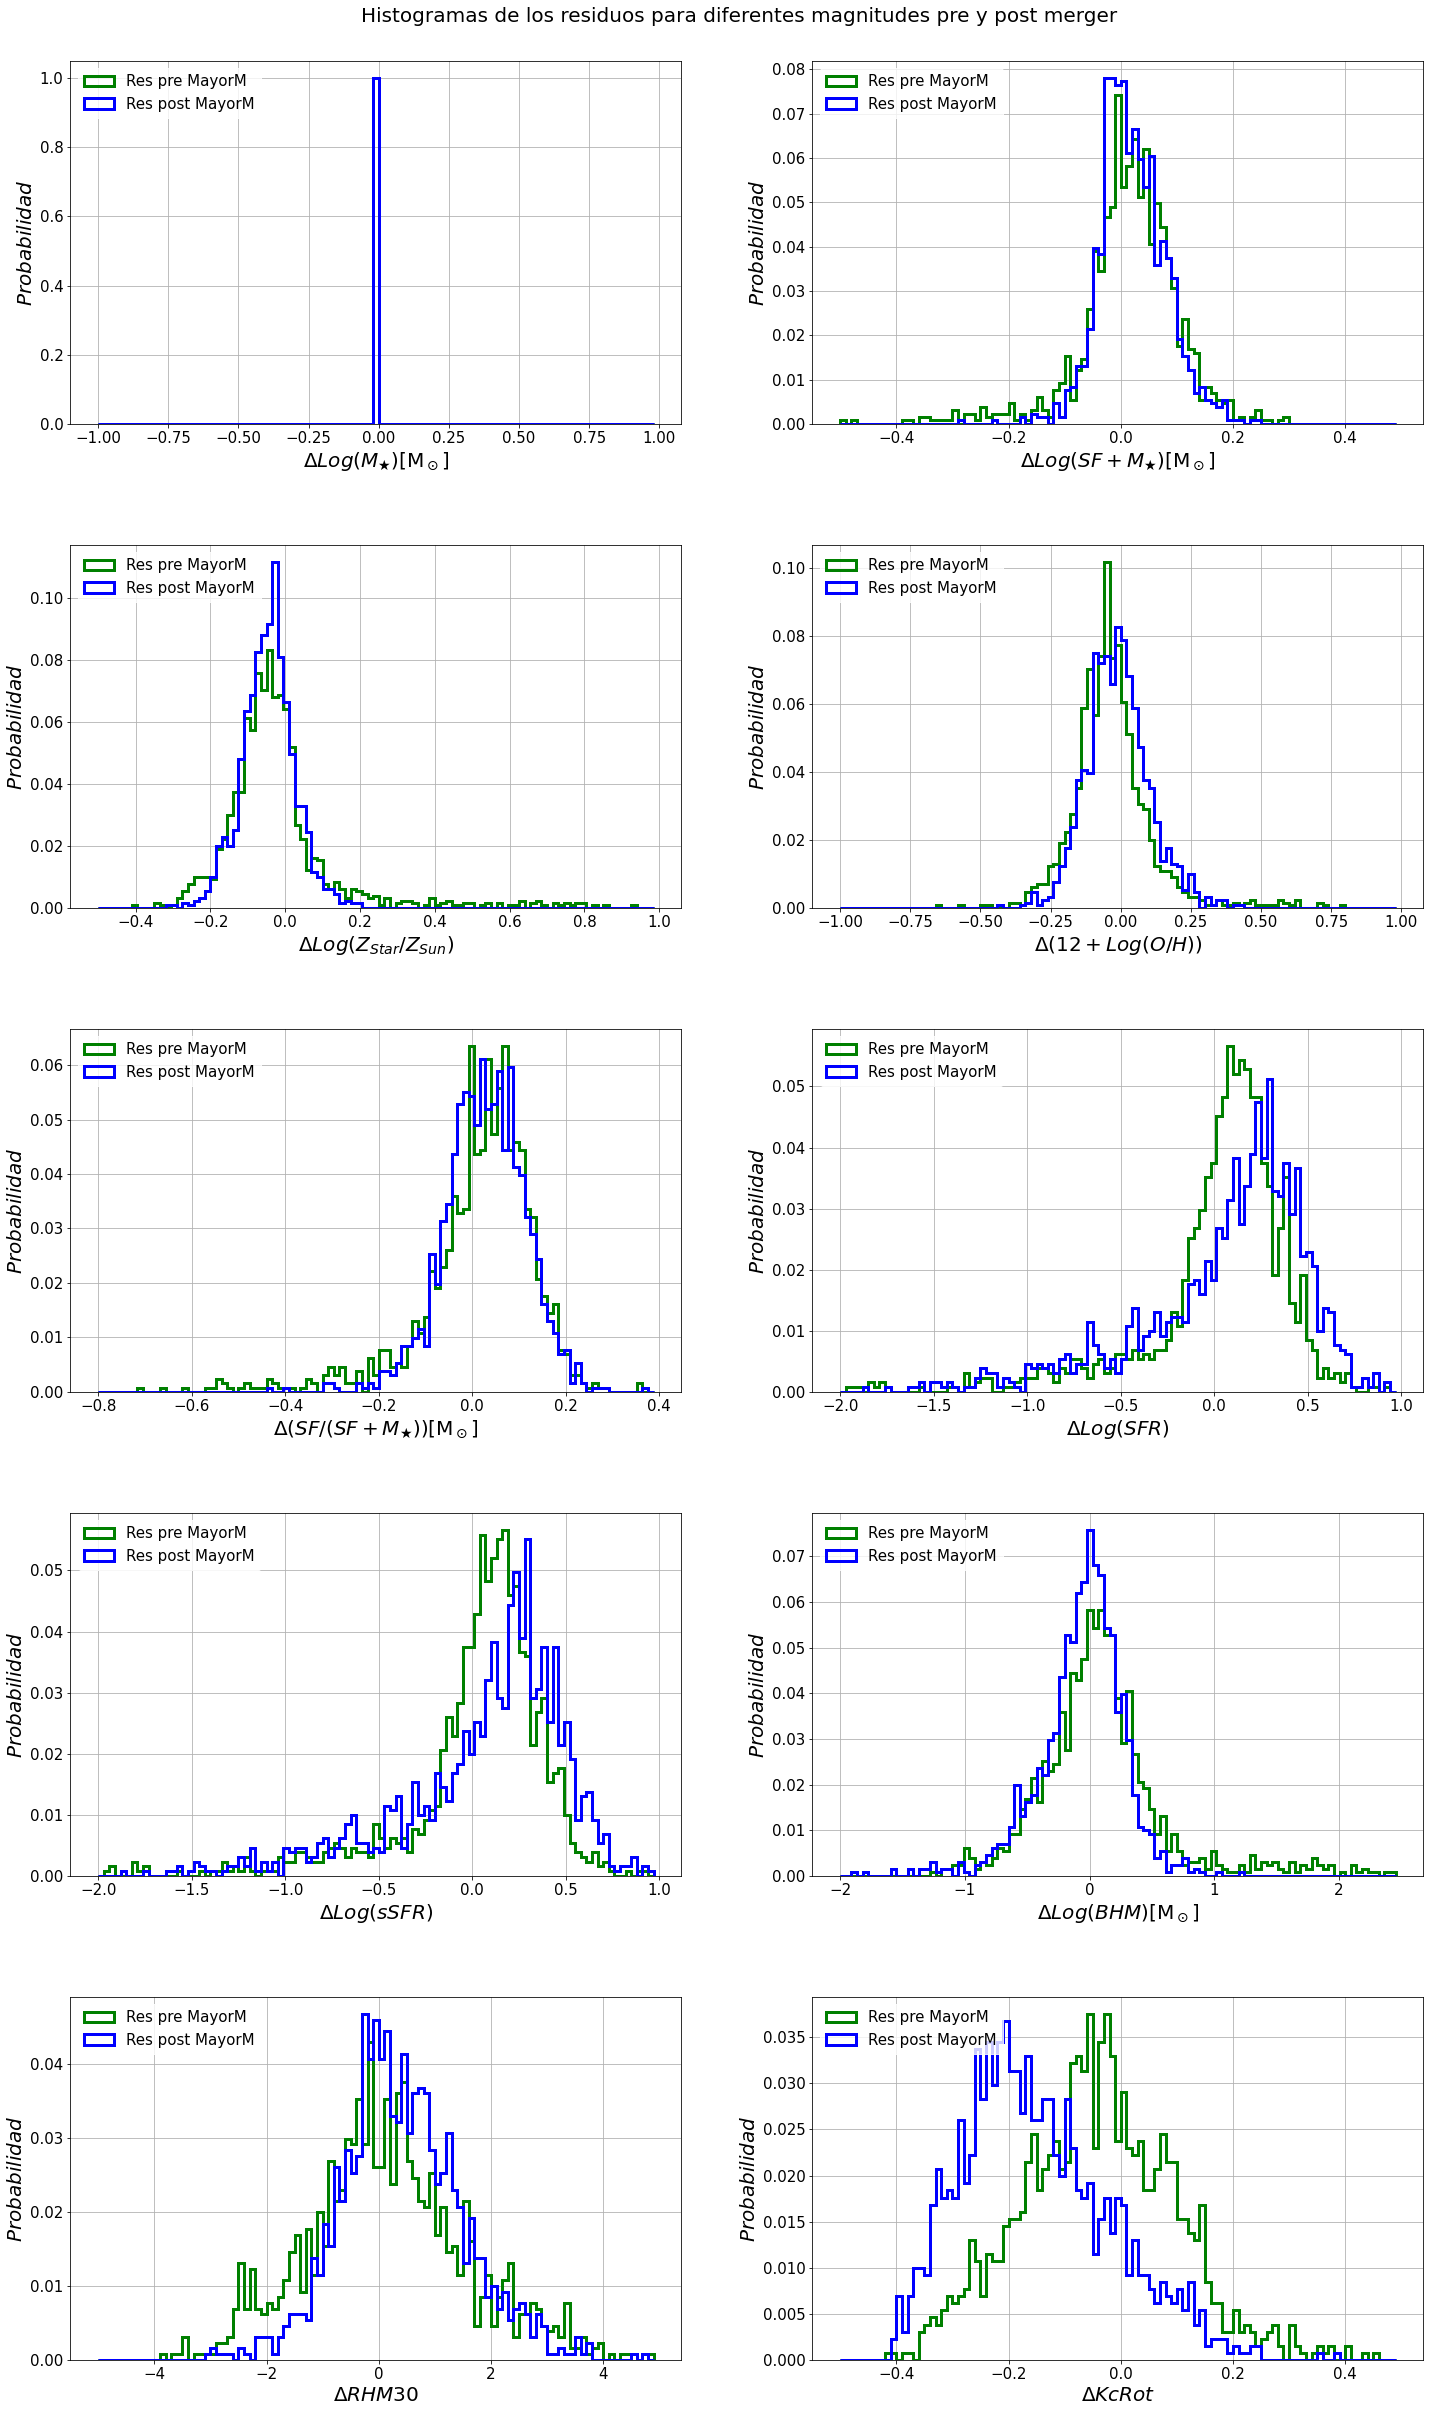

In [29]:
# Histogramas del las variables estudiadas

fig,ax = plt.subplots(5,2,figsize=(22,35))

ax = ax.flatten()

fig.tight_layout(pad=10)

# fontdict ={'fontsize': 40}

fig.suptitle('Histogramas de los residuos para diferentes magnitudes pre y post merger',fontsize=20)

columnas=100

Mayor = True
Minor = False
Micro = False
Non   = False

# Lista con las alturas de los bines

altura_mayor = []
altura_minor = []
altura_micro = []
altura_non   = []

colors = ['green','blue']
temporal = ['pre','post']


for j in np.arange(0,2):
    i=0
    for mayor,minor,micro,non in zip(Res_Mayor[j],Res_Minor[j],Res_Micro[j],Res_non[j]):
    
        width=abs(lim_var[i][1]-lim_var[i][0])/columnas
    
        bins = np.arange(lim_var[i][0],lim_var[i][1],width)
    
        if Mayor:
            var = mayor
            
            weights=np.ones_like(var)/float(len(var))       
            ax[i].hist(var,bins=bins,range=(lim_var[i][0],lim_var[i][1]),histtype='step',label='Res '+temporal[j]+' MayorM',linestyle='-',color=colors[j],linewidth=3,weights=weights)
    
#             h_var_mayor,b_mayor = np.histogram(var,bins,density=True)
#             ax[i].bar(b_mayor[:-1],height=h_var_mayor * np.diff(b_mayor),width =width,fill=False,edgecolor=col,
#                       capsize=4,linestyle='-',linewidth=2,label='Res Mayor Merger')
#             altura_mayor.append(h_var_mayor * np.diff(b_mayor))
    
        if Minor:
            var = minor

            weights=np.ones_like(var)/float(len(var))       
            ax[i].hist(var,bins=bins,range=(lim_var[i][0],lim_var[i][1]),histtype='step',label='Res '+temporal[j]+' MinorM',linestyle='-',color=colors[j],linewidth=3,weights=weights)            
        
#             h_var_minor,b_minor = np.histogram(var,bins,density=True)
#             ax[i].bar(b_minor[:-1],height=h_var_minor * np.diff(b_minor),width =width,fill=False,edgecolor=col,
#                       capsize=4,linestyle='--',linewidth=2,label='Res Minor Merger')
#             altura_minor.append(h_var_minor * np.diff(b_minor))
        
        if Micro:
            var = micro

            weights=np.ones_like(var)/float(len(var))       
            ax[i].hist(var,bins=bins,range=(lim_var[i][0],lim_var[i][1]),histtype='step',label='Res '+temporal[j]+' MicroM',linestyle='-',color=colors[j],linewidth=3,weights=weights)            
            
#             h_var_micro,b_micro = np.histogram(var,bins,density=True)
#             ax[i].bar(b_micro[:-1],height=h_var_micro * np.diff(b_micro),width =width,fill=False,edgecolor=col,
#                       capsize=4,linestyle='--',linewidth=2,label='Res Micro Merger')
#             altura_micro.append(h_var_micro * np.diff(b_micro))
        
        if Non:
            var = non
    
            weights=np.ones_like(var)/float(len(var))       
            ax[i].hist(var,bins=bins,range=(lim_var[i][0],lim_var[i][1]),histtype='step',label='Res '+temporal[j]+' NonM',linestyle='-',color=colors[j],linewidth=3,weights=weights)    
    
#             h_var_non,b_non = np.histogram(var,bins,density=True)
#             ax[i].bar(b_non[:-1],height=h_var_non * np.diff(b_non),width =width,fill=False,edgecolor=col,
#                       linewidth=2,capsize=4,linestyle='--',label='Res Non Merger')
#             altura_non.append(h_var_non * np.diff(b_non))
        
    
        ax[i].tick_params(axis='both', which='major', labelsize=15)
        ax[i].set_xlabel(dif_name[i],fontsize=20)
        ax[i].set_ylabel(r'$Probabilidad$',fontsize=20)    
        i=i+1
for i in np.arange(0,10):
    ax[i].grid()
    leg=ax[i].legend(loc='upper left',fontsize=15,edgecolor='w',handlelength=2)
    
# plt.savefig('/home/ramiro/Facultad/Tesis/Figuras/Actividad 10/figura_version1.png')


In [30]:
# Fin